In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from random import random,randint,seed,sample 
from sklearn.preprocessing import StandardScaler
import random as rn
import tensorflow as tf 
from scipy.special import expit
import sys 
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
dfor=pd.read_csv('/home/abraham/ML-ITAM/Den/Machine_Learning/or.csv') 

In [4]:
dfor=dfor.iloc[0:4,:]
dfor

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [46]:
X=np.asarray(dfor.iloc[:,0:2]) 
y=np.asarray(dfor.iloc[:,2])

In [4]:
def agunos(x):
    unos=np.array([np.ones(len(x))]) 
    x=np.array(np.concatenate((unos.T,x),axis=1)) 
    return x

In [48]:
X=agunos(X)
X

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  1.]])

In [98]:
def clasif(y): 
    pred=np.array([])
    for i in range(len(y)):
        if y[i]>=0:
            pr=1
        else:
            pr=0
        pred=np.append(pred,pr)  
    return pred


In [145]:
eta=1
w=np.random.uniform(0,1,size=3) 
output=clasif(np.dot(X,w.T)) 
err=y-output
dif=sum(err)
dif

2

In [146]:
while(abs(dif)!=0):
    
    for i in range(X.shape[1]):
        
        w[i]=w[i]+eta*np.dot(err,X[:,i]) 
        
    output=clasif(np.dot(X,w.T))    
    err=y-output 
    dif=sum(err)
    print(dif)

-1
-1
0


In [99]:
def train(X,y,eta):
    w=np.ones(X.shape[1])#np.random.uniform(0,1,size=X.shape[1])
    output=clasif(np.dot(X,w.T)) 
    err=y-output
    dif=sum(err)
    while(abs(dif)!=0):
        for i in range(X.shape[1]):
            w[i]=w[i]+eta*np.dot(y-clasif(np.dot(X,w.T)),X[:,i]) 
        output=clasif(np.dot(X,w.T)) 
        err=y-output 
        dif=sum(err)
    return w    

In [100]:
W=train(X,y,0.1) #entrena(X,y,0.1)
W

array([-0.1,  1. ,  1. ])

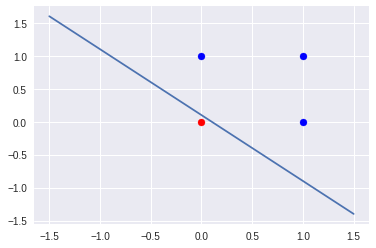

In [101]:
plt.scatter(dfor[dfor['y']==1]['x1'],dfor[dfor['y']==1]['x2'],color='blue') 
plt.scatter(dfor[dfor['y']==0]['x1'],dfor[dfor['y']==0]['x2'],color='red')
x=np.linspace(-1.5,1.5,10)
plt.plot(x,(-W[0]/W[2])+(-W[1]/W[2])*x)

In [102]:
dfand=pd.read_csv('/home/abraham/ML-ITAM/Den/Machine_Learning/and.csv') 
dfand=dfand.iloc[0:4,:] 
dfand

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [103]:
X_and=np.asarray(dfand.iloc[:,0:2])
y_and=np.asarray(dfand.iloc[:,2])

In [104]:
X_and=agunos(X_and)

In [107]:
ww=train(X_and,y_and,0.1)

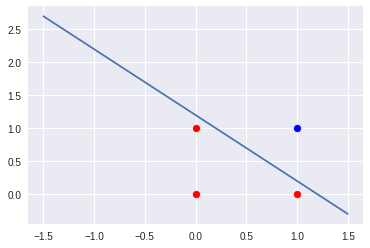

In [108]:
plt.scatter(dfand[dfand['y']==1]['x1'],dfand[dfand['y']==1]['x2'],color='blue') 
plt.scatter(dfand[dfand['y']==0]['x1'],dfand[dfand['y']==0]['x2'],color='red')
x=np.linspace(-1.5,1.5,10)
plt.plot(x,-(ww[0]/ww[2])-(ww[1]/ww[2])*x)

**XOR**

In [196]:
dfxor=pd.read_csv('/home/abraham/ML-ITAM/Den/Machine_Learning/xor.csv') 
dfxor.head()

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [197]:
X_xor=np.asarray(dfxor.iloc[:,0:2])
y_xor=np.asarray(dfxor.iloc[:,2])
y_xor=y_xor.reshape(len(y_xor),1)

In [198]:
X_xor=agunos(X_xor)

In [3]:

def sigmoid(x):
    return expit(x)

def dsigm(x):
    return x*(1.0-x)


In [337]:
w1=np.random.uniform(-1,1,size=3*3)
w1=w1.reshape(3,3)
w2=np.random.uniform(-1,1,size=3*1) 
w2=w2.reshape(3,1) 

epochs=5000

for i in range(epochs):
    n1=np.dot(X_xor,w1)
    H=sigmoid(n1) 
    n2=np.dot(H,w2) 
    Z=sigmoid(n2)
    err=y_xor-Z#output 
    dz=err*dsigm(Z) 
    dh=dz.dot(w2.T)*dsigm(H) 
    w2+=H.T.dot(dz) 
    w1+=X.T.dot(dh)

np.round(Z)  
w2
#print(np.argmax(Z,axis=1),w2)

array([[ -3.64110896],
       [-10.51773892],
       [  7.67052497]])

In [338]:
pred=np.round(Z)#np.argmax(Z,axis=1) 
print(classification_report(y_xor,pred))
print(confusion_matrix(y_xor,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         4

[[2 0]
 [0 2]]


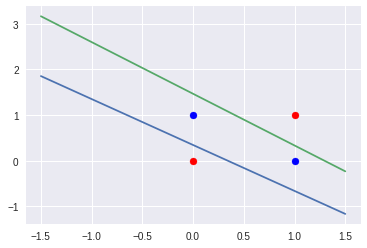

In [339]:
plt.scatter(dfxor[dfxor['y']==1]['x1'],dfxor[dfxor['y']==1]['x2'],color='blue') 
plt.scatter(dfxor[dfxor['y']==0]['x1'],dfxor[dfxor['y']==0]['x2'],color='red')
x=np.linspace(-1.5,1.5,10)
#plt.plot(x,-(w2[0,0]/w2[2,0])-(w2[1,0]/w2[2,0])*x) 

plt.plot(x,-(w1[0,1]/w1[2,1])-(w1[1,1]/w1[2,1])*x) 
plt.plot(x,-(w1[0,2]/w1[2,2])-(w1[1,2]/w1[2,2])*x)

**ANN**

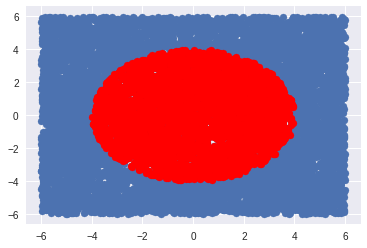

In [113]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from random import random,randint,seed,sample 
from sklearn.preprocessing import StandardScaler
import random as rn
import tensorflow as tf 
from scipy.special import expit
import sys 
from sklearn.metrics import confusion_matrix,classification_report

x1 = np.array([np.random.uniform(-6,6) for i in range(10000)])
x2 = np.array([np.random.uniform(-6,6) for i in range(10000)])

dat=pd.DataFrame(x1,columns=['x1'])
dat['x2']=x2 
dat['x1cuad']=dat['x1']**2
dat['x2cuad']=dat['x1']**2
dat['y']=(dat['x1']**2+dat['x2']**2).apply(lambda x: 1 if x<=16 else 0)
dat

plt.scatter(dat['x1'],dat['x2'])
plt.scatter(dat[dat['y']==1]['x1'],dat[dat['y']==1]['x2'],color='red')
#plt.plot(dat[dat['y']==1]['x1'],dat[dat['y']==1]['x2'],color='green')

X=np.asarray(dat[['x1','x2','x1cuad','x2cuad']]) 
#X=np.concatenate((np.ones((X.shape[0],1)), X), 1)
y=np.asarray(dat[['y']])

def sigm(x):
    return expit(x)#1.0/(1.0+np.exp(-x))

def dsigm(x): 
    x=sigm(x)
    return x*(1.0-x)

**Back propagation 1 paso**

In [114]:
eta=0.001
hidden=3
features=X.shape[1]
output=2
epochs=60000
w1=np.random.uniform(-1,1,size=(features+1)*hidden)
w1=w1.reshape(features+1,hidden)
w2=np.random.uniform(-1,1,size=(hidden+1)*output)
w2=w2.reshape(hidden+1,output)
a1=agunos(X)
z2=np.dot(a1,w1) 
a2=agunos(sigm(z2)) 
z3=np.dot(a2,w2) 
a3=sigm(z3) 

d3=y-a3 
z2=agunos(z2)
d2=np.dot(d3,w2.T)*dsigm(z2)
d2=d2[:,1:]
grad1=np.dot(a1.T,d2)
grad2=np.dot(a2.T,d3)

w1-=eta*grad1
w2-=eta*grad2

**Back propagation 60000 iteraciones**

In [115]:
w1=np.random.uniform(-1,1,size=(features+1)*hidden)
w1=w1.reshape(features+1,hidden)
w2=np.random.uniform(-1,1,size=(hidden+1)*output)
w2=w2.reshape(hidden+1,output)
for i in range(epochs): 
    a1=agunos(X)
    z2=np.dot(a1,w1) 
    a2=agunos(sigm(z2)) 
    z3=np.dot(a2,w2) 
    a3=sigm(z3) 
    
    d3=a3-y 
    z2=agunos(z2)
    d2=np.dot(d3,w2.T)*dsigm(z2)
    d2=d2[:,1:]
    grad1=np.dot(a1.T,d2)
    grad2=np.dot(a2.T,d3) 
    
    w1-=eta*grad1
    w2-=eta*grad2
w1    

array([[  1.21835713e+02,  -1.49201524e+02,  -1.26746133e+02],
       [ -4.59419188e-02,   2.35403242e-01,   1.57021295e-01],
       [ -3.11208274e+00,   3.70313952e+01,  -3.11636748e+01],
       [ -4.22625546e+00,   2.98706169e+00,   3.12175091e+00],
       [ -3.86798718e+00,   3.24188037e+00,   2.41543044e+00]])

In [116]:
a1=agunos(X)
z2=np.dot(a1,w1) 
a2=agunos(sigm(z2)) 
z3=np.dot(a2,w2) 
a3=sigmoid(z3) 

In [130]:
pprr=np.round(a3[:,0])#np.argmax(a3, axis=1) 
print(classification_report(y,pprr))
print(confusion_matrix(y,pprr))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      6598
          1       0.99      0.98      0.99      3402

avg / total       0.99      0.99      0.99     10000

[[6574   24]
 [  64 3338]]


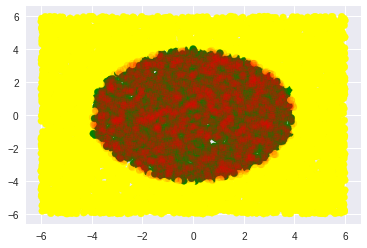

In [134]:
plt.scatter(dat['x1'],dat['x2'],color=['green' if i==1 else '' for i in pprr]) 
plt.scatter(dat[dat['y']==1]['x1'],dat[dat['y']==1]['x2'],color='red',alpha=0.1)

**Con Tensor flow**

In [155]:
n_output=1
x = tf.placeholder(tf.float32, shape=[len(X),features ])
y_ = tf.placeholder(tf.float32, shape=[len(y),n_output]) #la y real


W1=tf.Variable(tf.random_uniform([features,hidden],-1,1),name='W1') 
W2=tf.Variable(tf.random_uniform([hidden,n_output],-1,1),name='W2')
b1=tf.Variable(tf.zeros([hidden]),name='b1') 
b2=tf.Variable(tf.zeros([n_output]),name='b2')

In [156]:
H=tf.sigmoid(tf.matmul(x,W1)+b1) 
Z=tf.sigmoid(tf.matmul(H,W2)+b2) 

lossfn=tf.reduce_mean(((y_*tf.log(Z))+((1-y_)*tf.log(1.0-Z)))*-1)  

train_step=tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [157]:
init=tf.initialize_all_variables() 
sess=tf.Session()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [158]:
sess.run(init)
for i in range(50000):
    sess.run(train_step, feed_dict={x: X, y_: y})

In [161]:
predrr= np.round(sess.run(Z,feed_dict={x: X, y_: y})) 
print(classification_report(y,predrr))
print(confusion_matrix(y,predrr))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      6598
          1       0.99      0.97      0.98      3402

avg / total       0.99      0.99      0.99     10000

[[6577   21]
 [ 119 3283]]


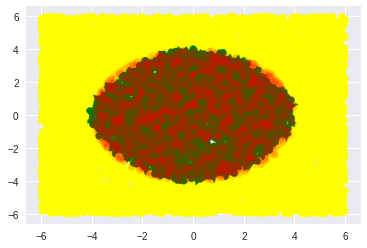

In [162]:
plt.scatter(dat['x1'],dat['x2'],color=['green' if i==1 else 'yellow' for i in predrr]) 
plt.scatter(dat[dat['y']==1]['x1'],dat[dat['y']==1]['x2'],color='red',alpha=0.1)